In [1]:
import pandas as pd
import json

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
fptr = open('via_export_coco.json')
data = json.load(fptr)
print(data.keys())

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])


In [3]:
images_df = pd.DataFrame(data['images'], columns = data['images'][0].keys())
annotations_df = pd.DataFrame(data['annotations'], columns = data['annotations'][0].keys())
images_df.head()

,id,width,height,file_name,license,date_captured
0,0,259,194,dog1.jpeg,1,
1,1,259,194,dog2.jpeg,1,
2,2,300,168,dog3.jpeg,1,
3,3,194,259,dog4.jpeg,1,
4,4,267,189,dog5.jpeg,1,


In [4]:
annotations_df.head()

,id,image_id,category_id,segmentation,area,bbox,iscrowd
0,0,0,1,"[11, 23, 238, 23, 238, 161, 11, 161]",31326,"[11, 23, 227, 138]",0
1,1,1,1,"[79, 16, 199, 16, 199, 189, 79, 189]",20760,"[79, 16, 120, 173]",0
2,2,2,1,"[55, 16, 262, 16, 262, 161, 55, 161]",30015,"[55, 16, 207, 145]",0
3,3,3,1,"[29, 48, 191, 48, 191, 255, 29, 255]",33534,"[29, 48, 162, 207]",0
4,4,4,1,"[54, 41, 260, 41, 260, 169, 54, 169]",26368,"[54, 41, 206, 128]",0


In [5]:
imp_df = pd.concat([images_df, annotations_df], 1)[['file_name', 'width', 'height', 'bbox']]
x_ = []
y_ = []
w_ = []
h_ = [] 
for row in range(imp_df.shape[0]):
  x_.append(imp_df['bbox'][row][0])
  y_.append(imp_df['bbox'][row][1])
  w_.append(imp_df['bbox'][row][2])
  h_.append(imp_df['bbox'][row][3])
box_df = pd.DataFrame(list(zip(x_, y_, w_, h_)), columns =['x', 'y', 'box_width', 'box_height'])
imp_df = pd.concat([imp_df, box_df], 1)
imp_df = imp_df.drop('bbox', axis =1)
imp_df.head()

,file_name,width,height,x,y,box_width,box_height
0,dog1.jpeg,259,194,11,23,227,138
1,dog2.jpeg,259,194,79,16,120,173
2,dog3.jpeg,300,168,55,16,207,145
3,dog4.jpeg,194,259,29,48,162,207
4,dog5.jpeg,267,189,54,41,206,128


In [6]:
imp_df['x'] = imp_df['x'] / imp_df['width']
imp_df['y'] = imp_df['y'] / imp_df['height']
imp_df['box_width'] = imp_df['box_width'] / imp_df['width']
imp_df['box_height'] = imp_df['box_height'] / imp_df['height']
imp_df.head()

,file_name,width,height,x,y,box_width,box_height
0,dog1.jpeg,259,194,0.042471,0.118557,0.876448,0.711340
1,dog2.jpeg,259,194,0.305019,0.082474,0.463320,0.891753
2,dog3.jpeg,300,168,0.183333,0.095238,0.690000,0.863095
3,dog4.jpeg,194,259,0.149485,0.185328,0.835052,0.799228
4,dog5.jpeg,267,189,0.202247,0.216931,0.771536,0.677249


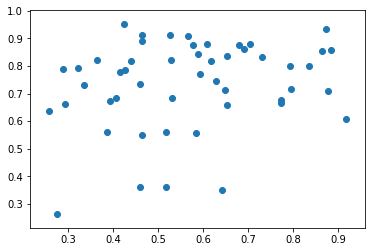

In [7]:
imp_stripped = imp_df[["box_width", "box_height"]].to_numpy()
plt.scatter(imp_stripped[:,0], imp_stripped[:,1])

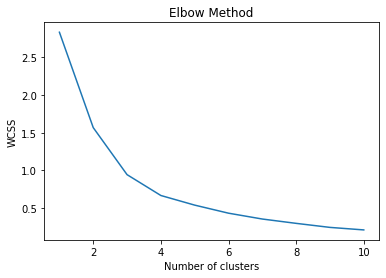

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(imp_stripped)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

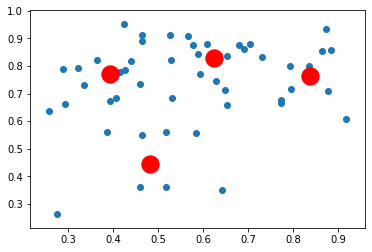

In [9]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(imp_stripped)
plt.scatter(imp_stripped[:,0], imp_stripped[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()